# <비용 대비 효과적인 위스키 추천 알고리즘 제안 연구>
### 1. 고객은 선호하는 taste note를 작성한다. 아울러 정량화된 맛 표현 설명조 사에 응한다(설문항목은 14개가 아니라 PCA에 의해 차원축소 가능). 이때 만약 이전에 구매한 선호물품들에 대한 이력이 있다면 구매이력 품목으 로부터 taste note를 자동 생성하는 것도 가능하다.
### 2. 알고리즘은 구매자의 입력에 대해 가장 유사한 N개의 이웃 제품분류(class) 들을 찾는다.
### 3. 찾은 N개의 이웃제품들에 대해 평균 가격정보를 검색한다.
### 4. 찾은 N개의 이웃제품들 각각에 대한 유사도를 B, 단계3에서 찾은 각 제품 의 평균가격을 C라고 할 때, R = B/C를 계산한다. R값을 기준으로 찾은 N 개의 이웃제품들을 내림차순 정렬한다.
### 5. 단계4 내림차순 정렬 결과에서 1순위를 고객에게 추천한다. 만약 과거 구매이력을 참고했을 때 1순위 제품이 이미 경험한 제품이라면 그다음 2순위 제품을 고객에게 추천한다.
### 6. 단계5에서 제품 추천 시 풍미에 대한 워드클라우드를 시각적으로 생성하여 고객에게 제품명과 함께 제시한다.

C=A/B 공식을 변형하여 평점 부분을 추가. 
C = (w1*A + w2*R)/B와 같이 수정.
수정된 공식에서 R은 평점을 의미한다. 즉, 평점(R)이 높고 가격(B)이 낮을 수록 가성비(C)는 높아진다. A(개인 선호도)와 R을 적절히 공식에 적용하기 위해 w1과 w2라는 가중치 밸런스를 정함. 기본적으로 w1:w2=50%:50%, 예를 들어 어떤 사람은 개인선호도보다는 distiller의 평을 높게 평가하여 추천받고 싶다면 w1:w2=20%:80%으로 수정할 수도 있을 것이다.

<hr style="border: 2px solid rgb(10, 47, 102)">
<center><span style="font-size: 2.5em; font-weight: bold; color: #000000;">데이터셋 설명</span>
<hr style="border: 2px solid rgb(10, 47, 102)">

<h2>Name</h2><p>: 위스키의 이름.

<h2>Rating</h2><p>: 위스키의 평점. 5점 만점.

<h2>Rating count</h2><p>: 위스키에 대한 평가(평점을 매긴 사람들의 수)의 총 개수.

<h2>kind_of_whisky</h2><p>: 위스키의 종류 또는 유형.

<h2>Country</h2><p>: 위스키가 생산된 국가.

<h2>Region</h2><p>: 위스키가 생산된 특정 지역.

<h2>Cost level</h2><p>: 위스키의 가격 수준(달러 기준).<p>
<h3>1 : ~25<p>
<h3>2 : 25~50<p>
<h3>3 : 50~80<p>
<h3>4 : 80~150<p>
<h3>5 : 150~<p>
    
<h3>Flavor Profile</h3><p>: 위스키의 맛과 향을 설명하는 특성.

<h3>Age</h3><p>: 위스키가 숙성되는 기간 또는 연령.

<h3>abv</h3><p>: 위스키의 알코올 도수(Alcohol By Volume).

<h3>Cask type</h3><p>: 위스키가 숙성되는 동안 사용된 통의 종류.

<h3>Style</h3><p>: 위스키의 스타일.
    
<h3>Taste Note</h3><p>: 위스키의 맛과 향을 설명.
    
<h2>Smoky</h2><p>: 위스키에 스모키 또는 이탄 향이 나는 것을 말하며, 이는 맥아를 이탄 불로 건조할 때 발생할 수 있습니다. 이 특성은 종종 스코틀랜드의 아일레이와 같은 지역의 위스키와 관련이 있습니다.
    
<h2>Peaty</h2><p>: 피티 위스키는 스모키 위스키와 마찬가지로 몰팅 과정에서 이탄을 사용하기 때문에 흙냄새, 스모키, 때로는 약용 향이 뚜렷합니다.
    
<h2>Spicy</h2><p>: 스파이시한 특성의 위스키는 후추, 계피, 정향 또는 육두구와 같은 다양한 향신료를 연상시키는 풍미를 나타냅니다. 이는 풍미 프로파일에 복잡함과 따뜻함을 더할 수 있습니다.

<h2>Herbal</h2><p>: 위스키의 허브 노트에는 민트, 백리향 또는 풀 향과 같은 신선하거나 말린 허브의 힌트가 포함될 수 있습니다. 이는 맛에 신선함을 더합니다.

<h2>Oily</h2><p>: 오일리 위스키는 종종 더 두껍고 부드러운 목 넘김을 가진 것으로 묘사되는 질감을 가지고 있습니다. 이는 액체의 점도가 높기 때문일 수 있습니다.

<h2>Full_bodied</h2><p>: 풀바디 위스키는 입안에서 묵직하고 풍부한 느낌을 줍니다. 풀바디 위스키는 숙성, 캐스크 유형 및 증류 방법과 같은 여러 요인이 복합적으로 작용하여 무게감 있고 균형 잡힌 특성을 지니고 있습니다.

<h2>Rich</h2><p>: 리치 위스키는 일반적으로 숙성, 사용된 배럴의 종류, 재료의 품질과 같은 요인이 복합적으로 작용하여 풍미와 복합성이 깊어집니다.
    
<h2>Sweet</h2><p>: 단맛이 나는 위스키는 카라멜, 토피, 꿀, 과일의 단맛 등 단맛을 연상시키는 맛과 향이 특징입니다.
    
<h2>Briny</h2><p>: 이 특성은 종종 해안 또는 해양 위스키와 관련이 있습니다. 바다 공기를 연상시키는 미묘한 짠맛이나 짠맛을 말합니다.
    
<h2>Salty</h2><p>: 짭짤한 위스키는 풍미 프로파일에서 바닷물 맛과 비슷한 짠맛이 더 두드러집니다.
    
<h2>Vanilla</h2><p>: 바닐라 향이 나는 위스키는 바닐라 꼬투리를 연상시키는 풍미를 지니고 있어 전체적인 맛에 크리미하고 달콤한 차원을 제공할 수 있습니다.
    
<h2>Tart</h2><p>: 타르트 위스키는 약간 시큼하거나 톡 쏘는 풍미가 특징이며, 감귤류나 산성 노트와 비슷한 경우가 많습니다.
    
<h2>Fruity</h2><p>: 프루티 위스키는 사과, 배와 같은 과수원 과일부터 망고, 파인애플과 같은 열대 과일까지 다양한 과일을 연상시키는 맛과 향을 선보입니다.
    
<h2>Floral</h2><p>: 플로럴 특성이 있는 위스키는 꽃을 연상시키는 향과 풍미를 지니고 있으며, 가볍고 은은한 것부터 더 두드러지고 향기로운 것까지 다양합니다.

In [2]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from nltk.corpus import stopwords
from wordcloud import WordCloud
from PIL import Image

In [3]:
# 데이터베이스 로드
data = pd.read_csv('/Users/seojuncheol/Desktop/논문/whiskey/data/whiskey_info.csv')

<hr style="border: 2px solid rgb(10, 47, 102)">
<center><span style="font-size: 2.5em; font-weight: bold; color: #000000;">데이터 확인작업</span>
<hr style="border: 2px solid rgb(10, 47, 102)">

In [32]:
data.info

<bound method DataFrame.info of                                      Name  Rating  Rating count  \
0                   Buffalo Trace Bourbon    3.70         12552   
1                       Lagavulin 16 Year    4.39         11600   
2        Blanton's Original Single Barrel    4.29         11842   
3              Eagle Rare 10 Year Bourbon    4.05         11501   
4                       Laphroaig 10 Year    3.97          9568   
...                                   ...     ...           ...   
17375  Glen Turner 12 Year Master Reserve    3.00             1   
17376      Glenrothes 1989 (Bottled 2002)    3.50             1   
17377    Shelter Point Ripple Rock Whisky    3.75             1   
17378            Potter's Special Old Rye    2.00             1   
17379                  Oppidan Cane + Rye    2.00             1   

         kind_of_whisky   Country     Region  Cost level       Flavor Proflie  \
0               Bourbon       USA   Kentucky           2                Sweet   
1

In [5]:
df2 = data[(data['Taste Note'] != "None")]
print(len(df2))

3493


In [4]:
filtered_data = data[(data.iloc[:, 13:28] != 0).any(axis=1)]
print(len(filtered_data))

3492


<hr style="border: 2px solid rgb(10, 47, 102)">
<center><span style="font-size: 2.5em; font-weight: bold; color: #000000;">추천알고리즘</span>
<hr style="border: 2px solid rgb(10, 47, 102)">

## ver_1 사용자 입력데이터와 기존 데이터만의 유사도로 추천

In [3]:
# TF-IDF 벡터화를 위한 준비
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
taste_matrix = tfidf_vectorizer.fit_transform(data['Taste Note'])

# 사용자 입력 받기
user_taste = input("원하는 맛을 입력하세요: ")
print("")

user_richness = int(input("Rich 정도를 입력하세요(0~10): ")) * 10
print("")

user_full_bodied = int(input("Full-bodied 정도를 입력하세요(0~10): ")) * 10
print("")

user_sweetness = int(input("Sweet 정도를 입력하세요(0~10): ")) * 10
print("")

# 입력 데이터를 사용자와 유사한 데이터로 변환
user_taste_vector = tfidf_vectorizer.transform([user_taste])
user_data = [[user_richness, user_full_bodied, user_sweetness]]
user_data_matrix = pd.DataFrame(user_data, columns=['Rich', 'Full_bodied', 'Sweet'])

# 유사도 계산
taste_similarity = cosine_similarity(user_taste_vector, taste_matrix)
numeric_similarity = cosine_similarity(user_data_matrix, data[['Rich', 'Full_bodied', 'Sweet']])

# 총 유사도 계산 (예시로 각각 0.5씩 가중치를 줌)
total_similarity = 0.5 * taste_similarity + 0.5 * numeric_similarity

# 유사도 기반으로 상위 5개 위스키 추출
top_indices = total_similarity.argsort()[0][-5:][::-1]
top_whiskies = data.iloc[top_indices]

print("추천 위스키 목록:")
print(top_whiskies[['Name']])

원하는 맛을 입력하세요: cinnamon, vanilla, caramel, apples, and a touch of leather.

Rich 정도를 입력하세요(0~10): 10

Full-bodied 정도를 입력하세요(0~10): 90

Sweet 정도를 입력하세요(0~10): 80

추천 위스키 목록:
                                        Name
254         Old Forester 1870 Original Batch
0                      Buffalo Trace Bourbon
1770         Swift Single Malt Texas Whiskey
173   Belle Meade Sour Mash Straight Bourbon
1886                     Glenmorangie Túsail


## 찾은 N개의 이웃에서 B(유사도), C(평균가격)을 정하고 R값을 구하는 공식을 만듬
## R = B/C

In [48]:
# TF-IDF 벡터화를 위한 준비
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
taste_matrix = tfidf_vectorizer.fit_transform(data['Taste Note'])

# 사용자 입력 받기
user_taste = input("원하는 맛을 입력하세요: ")
print("")

user_richness = int(input("Rich 정도를 입력하세요(0~10): ")) * 10
print("")

user_full_bodied = int(input("Full-bodied 정도를 입력하세요(0~10): ")) * 10
print("")

user_sweetness = int(input("Sweet 정도를 입력하세요(0~10): ")) * 10
print("")

# 입력 데이터를 사용자와 유사한 데이터로 변환
user_taste_vector = tfidf_vectorizer.transform([user_taste])
user_data = [[user_richness, user_full_bodied, user_sweetness]]
user_data_matrix = pd.DataFrame(user_data, columns=['Rich', 'Full_bodied', 'Sweet'])

# 유사도 계산
taste_similarity = cosine_similarity(user_taste_vector, taste_matrix)
numeric_similarity = cosine_similarity(user_data_matrix, data[['Rich', 'Full_bodied', 'Sweet']])

# 총 유사도 계산 (예시로 각각 0.5씩 가중치를 줌)
total_similarity = 0.5 * taste_similarity + 0.5 * numeric_similarity

# 유사도 기반으로 상위 5개 위스키 추출
top_indices = total_similarity.argsort()[0][-5:][::-1]
top_whiskies = data.iloc[top_indices]

# 가격 정보를 가져와 R Ratio 계산 및 정렬
R_ratios = []
for idx in top_indices:
    similarity = total_similarity[0][idx]
    average_price = data.loc[idx, 'Cost level']  # 가격 정보 가져오기 (변수명을 데이터프레임 내 실제 가격 컬럼명으로 수정해야 함)
    R_ratio = similarity / average_price
    R_ratios.append(R_ratio)

# 결과를 DataFrame으로 저장
result_data = {'Whiskey': top_whiskies['Name'], 'Similarity': total_similarity[0][top_indices], 'Cost level': top_whiskies['Cost level'], 'R Ratio': R_ratios}
result_df = pd.DataFrame(result_data)

# R Ratio를 기준으로 내림차순 정렬
sorted_result = result_df.sort_values(by='R Ratio', ascending=False)

print("추천 위스키 목록 :")
print(sorted_result[['Whiskey']])

원하는 맛을 입력하세요: apple, honey, flower, smoky, peaty, sweet

Rich 정도를 입력하세요(0~10): 8

Full-bodied 정도를 입력하세요(0~10): 10

Sweet 정도를 입력하세요(0~10): 2

추천 위스키 목록 :
                           Whiskey
5086   Wemyss Peat Chimney 12 Year
2253  Connemara Distillers Edition
4539         Benriach Smoke Season
3156   Octomore 10.4/88 Virgin Oak
1567         Royal Brackla 16 Year


## 수정된 공식을 대입
## R값을 구해 높은순으로 정렬 하는것은 동일
## R=B/C 공식을 변형하여 평점 부분을 추가. R= (w1B + w2A)/C와 같이 수정. 
## B(유사도), A(평점), C(가격), w1/w2(가중치)

In [5]:
# TF-IDF 벡터화를 위한 준비
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
taste_matrix = tfidf_vectorizer.fit_transform(data['Taste Note'])

# 사용자 입력 받기
user_taste = input("원하는 맛을 입력하세요: ")
print("")

user_richness = int(input("Rich 정도를 입력하세요(0~10): ")) * 10
print("")

user_full_bodied = int(input("Full-bodied 정도를 입력하세요(0~10): ")) * 10
print("")

user_sweetness = int(input("Sweet 정도를 입력하세요(0~10): ")) * 10
print("")

# 입력 데이터를 사용자와 유사한 데이터로 변환
user_taste_vector = tfidf_vectorizer.transform([user_taste])
user_data = [[user_richness, user_full_bodied, user_sweetness]]
user_data_matrix = pd.DataFrame(user_data, columns=['Rich', 'Full_bodied', 'Sweet'])

w1 = 0.5  #Taste Note 가중치
w2 = 0.5  #Rich, Full_bodied, Sweet 가중치

# 유사도 계산
taste_similarity = cosine_similarity(user_taste_vector, taste_matrix)
numeric_similarity = cosine_similarity(user_data_matrix, data[['Rich', 'Full_bodied', 'Sweet']])

# 총 유사도 계산 (Taste Note에 대한 Text 데이터와 정량화된 Rich, Full_bodied, Sweet데이터의 가중치를 반반으로 둠)
total_similarity = w1 * taste_similarity + w2 * numeric_similarity

# 유사도 기반으로 상위 5개 위스키 추출
top_indices = total_similarity.argsort()[0][-5:][::-1]
top_whiskies = data.iloc[top_indices]

# 평점과 가격 정보를 활용하여 R Ratio 계산 및 정렬
R_ratios = []
w3 = 0.5  #유사도 가중치
w4 = 0.5  #평점 가중치

for idx in top_indices:
    similarity = total_similarity[0][idx]
    rating = data.loc[idx, 'Rating']  # 평점 정보 가져오기
    cost_level = data.loc[idx, 'Cost level']  # 가격 정보 가져오기
    R_ratio = (w3 * similarity + w4 * rating) / cost_level
    R_ratios.append(R_ratio)

# 결과를 DataFrame으로 저장
result_data = {'Whiskey': top_whiskies['Name'], 'Taste Note': top_whiskies['Taste Note'], 'Similarity': total_similarity[0][top_indices], 'Rating': top_whiskies['Rating'], 'Cost level': top_whiskies['Cost level'], 'R Ratio': R_ratios}
result_df = pd.DataFrame(result_data)

# R Ratio를 기준으로 내림차순 정렬
sorted_result = result_df.sort_values(by='R Ratio', ascending=False)

print("추천 위스키 목록:")
print(sorted_result[['Whiskey','R Ratio']],'\n')
print("추천 위스키:",sorted_result['Whiskey'].iloc[0])

원하는 맛을 입력하세요: Buffalo Trace Bourbon shows a medium intensity on the nose with light spice (particularly cinnamon), vanilla, caramel, apples, and a touch of leather. The bourbon is soft on the palate with a creamed corn taste profile and a gentle sweetness. The finish is tangy and offers a medium spice note. A great everyday dram

Rich 정도를 입력하세요(0~10): 4

Full-bodied 정도를 입력하세요(0~10): 4

Sweet 정도를 입력하세요(0~10): 6

추천 위스키 목록:
                                                Whiskey   R Ratio
0                                 Buffalo Trace Bourbon  1.174901
108                                Old Pulteney 12 Year  1.098725
16                     Elijah Craig Small Batch Bourbon  1.078416
1836  Four Roses Limited Edition Small Batch Bourbon...  0.623763
2182             Eagle Rare 17 Year Bourbon (Fall 2017)  0.614968 

추천 위스키: Buffalo Trace Bourbon


### 평점과 유사도의 결합 문제: R Ratio를 계산할 때 유사도와 평점을 단순히 더하는 방식으로 결합할 경우, 유사도와 평점의 단위 차이로 인해 결과가 왜곡될 수 있음. 예를 들어, 유사도의 범위는 -1에서 1인 반면 평점의 범위는 0에서 5 사이임. 이러한 차이를 고려하지 않고 단순히 더하면 두 값 사이의 상대적 중요성이 편향될 수 있음

### Full_bodied와 Rich는 유사한 키워드임으로 다른 논문을 참고해 Rich만 남기고 추가로 Smoky를 추거

### 코드 모듈화후 최종 코드 완성

In [41]:
class WhiskeyRecommender:
    def __init__(self, data_path):
        # 데이터 로드 및 TF-IDF 벡터라이저 초기화
        self.data = pd.read_csv(data_path)
        # TF-IDF 벡터라이저를 영어 불용어를 제거하는 옵션으로 초기화.
        self.tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    def prepare_data(self):
        # 맛 정보 텍스트 데이터를 TF-IDF 매트릭스로 변환
        self.taste_matrix = self.tfidf_vectorizer.fit_transform(self.data['Taste Note'])

    def get_user_input(self):
        w1, w2 = 0.5, 0.5  # 기본 가중치 설정

        while True:
            preference_option = int(input("추천 방식을 선택해주세요 (1: 개인선호도, 2: 평점, 3: 보통): "))

            if preference_option == 1:
                w1, w2 = 0.7, 0.3
            elif preference_option == 2:
                w1, w2 = 0.3, 0.7
            elif preference_option == 3:
                w1, w2 = 0.5, 0.5
            else:
                print("올바른 선택지를 입력하세요.")
                continue
                    
            user_taste = input("원하는 맛을 입력하세요: ")
            try:
                user_richness = int(input("Rich 정도를 입력하세요(0~10): ")) * 10
                user_full_bodied = int(input("Full-bodied 정도를 입력하세요(0~10): ")) * 10
                user_smoky = int(input("Smoky 정도를 입력하세요(0~10): ")) * 10
                user_sweetness = int(input("Sweet 정도를 입력하세요(0~10): ")) * 10

                if 0 <= user_richness <= 100 and 0 <= user_full_bodied <= 100 and 0 <= user_smoky <= 100 and 0 <= user_sweetness <= 100:
                    return user_taste, w1, w2, user_richness, user_full_bodied, user_smoky, user_sweetness
                else:
                    print("올바른 범위의 값을 입력하세요.")
            except ValueError:
                print("숫자를 입력하세요.")


    def calculate_similarity(self, user_taste_vector, user_data_matrix):
        # 사용자 입력과 위스키 데이터 간의 유사도 계산
        taste_similarity = cosine_similarity(user_taste_vector, self.taste_matrix)
        numeric_similarity = cosine_similarity(user_data_matrix, self.data[['Rich', 'Full_bodied', 'Smoky', 'Sweet']])
        total_similarity = 0.5 * taste_similarity + 0.5 * numeric_similarity
        return total_similarity

    def recommend_whiskies(self, total_similarity):
        # 가장 유사한 위스키 추천
        top_indices = total_similarity.argsort()[0][-5:][::-1]
        top_whiskies = self.data.iloc[top_indices]
        return top_whiskies

    def calculate_r_ratios(self, top_indices, total_similarity, w1, w2):
        '''
        R값 계산
        계산식 : R= (w1B + w2A)/C
        B(유사도), A(평점), C(가격), w1/w2(가중치)
        '''
        R_ratios = []

        # MinMaxScaler 객체 생성
        scaler = MinMaxScaler()

        for idx in top_indices:
            similarity = total_similarity[0][idx]
            rating = self.data.loc[idx, 'Rating'] # 평점 정보 가져오기
            cost_level = self.data.loc[idx, 'Cost level'] # 가격 정보 가져오기

            # 평점을 0에서 1 사이로 정규화
            normalized_rating = scaler.fit_transform([[rating]])[0][0]

            R_ratio = (w1 * similarity + w2 * normalized_rating) / (cost_level if cost_level != 0 else 1)
            R_ratios.append(R_ratio)
        return R_ratios


    def print_recommendations(self, sorted_result):
        # 추천 위스키 목록과 첫 번째 추천 위스키 출력
        print("추천 위스키 목록:")
        print(sorted_result[['Whiskey', 'R Ratio']], '\n')
        print("추천 위스키:", sorted_result['Whiskey'].iloc[0])

원하는 맛을 입력하세요: fruity and vanilla
Rich 정도를 입력하세요(0~10): 7
Smoky 정도를 입력하세요(0~10): 8
Sweet 정도를 입력하세요(0~10): 2
추천 위스키 목록:
                                         Whiskey   R Ratio
5608          Rock Oyster Cask Strength Batch #1  1.062599
4156                    Prizefight Irish Whiskey  1.023647
4171            Kornog Peated Single Malt Whisky  0.712165
4666  Kilkerran Work in Progress #7 Bourbon Wood  0.554881
4474               Nikka Yoichi Woody & Vanillic  0.443423 

추천 위스키: Rock Oyster Cask Strength Batch #1


In [ ]:
def main():
    # 파일 경로 설정
    data_path = '/Users/seojuncheol/Desktop/논문/whiskey/data/whiskey_info.csv'
    img_path = '/Users/seojuncheol/Desktop/논문/whiskey/data/word_cloud/whisky_bottle.png'
    taste_file_path = '/Users/seojuncheol/Desktop/논문/whiskey/data/word_cloud/taste.txt'
    
    # 위스키 추천 시스템 객체 생성 및 데이터 준비
    recommender = WhiskeyRecommender(data_path)
    recommender.prepare_data()  # 맛 정보를 TF-IDF 매트릭스로 변환

    # 사용자 입력 받기
    user_taste, w1, w2, user_richness, user_full_bodied, user_smoky, user_sweetness = recommender.get_user_input()

    # 사용자 입력을 기반으로 유사도 계산에 사용할 데이터 준비
    user_taste_vector = recommender.tfidf_vectorizer.transform([user_taste])
    user_data = [[user_richness, user_full_bodied, user_smoky, user_sweetness]]
    user_data_matrix = pd.DataFrame(user_data, columns=['Rich', 'Full_bodied', 'Smoky', 'Sweet'])

    # 유사도 계산
    total_similarity = recommender.calculate_similarity(user_taste_vector, user_data_matrix)

    # 가장 유사한 위스키 추천
    top_whiskies = recommender.recommend_whiskies(total_similarity)

    # R 값 계산
    R_ratios = recommender.calculate_r_ratios(top_whiskies.index, total_similarity, w1, w2)

    # 결과 데이터프레임 생성 및 정렬
    result_data = {'Whiskey': top_whiskies['Name'], 'Taste Note': top_whiskies['Taste Note'],
                   'Similarity': total_similarity[0][top_whiskies.index], 'Rating': top_whiskies['Rating'],
                   'Cost level': top_whiskies['Cost level'], 'R Ratio': R_ratios}
    result_df = pd.DataFrame(result_data)
    sorted_result = result_df.sort_values(by='R Ratio', ascending=False)

    # 추천 결과 및 첫 번째 추천 위스키 출력
    recommender.print_recommendations(sorted_result)

In [ ]:
# 프로그램 시작점
if __name__ == "__main__":
    main()

<hr style="border: 2px solid rgb(10, 47, 102)">
<center><span style="font-size: 2.5em; font-weight: bold; color: #000000;">워드클라우드 적용</span>
<hr style="border: 2px solid rgb(10, 47, 102)">

## 단어 사전 만들기

In [29]:
filtered_data = data[(data['Taste Note'] != "None")]
combined_taste_note = ' '.join(filtered_data['Taste Note'])
all_tokens = preprocessing([combined_taste_note])
all_word_count = make_token_freq_dict(all_tokens)

In [30]:
sorted_word_freq = sorted(all_word_count.items(), key=lambda x: x[1], reverse=True)
for word, count in sorted_word_freq:
    print(f"{word}: {count}")

palate: 2344
finish: 2344
nose: 2092
vanilla: 1970
notes: 1665
sweet: 1481
oak: 1324
whisky: 1100
spice: 1026
whiskey: 948
spices: 918
smoke: 902
chocolate: 894
caramel: 870
flavors: 823
rye: 789
cinnamon: 787
fruits: 760
honey: 730
along: 725
well: 710
bit: 695
theres: 671
like: 653
rich: 644
fruit: 640
dark: 615
spicy: 597
pepper: 581
sweetness: 575
bourbon: 565
dried: 550
orange: 547
peat: 544
wood: 543
also: 516
touch: 496
aroma: 476
light: 466
aromas: 463
apple: 460
sugar: 428
malt: 426
toasted: 421
dry: 420
leather: 407
one: 407
long: 398
barrel: 398
taste: 393
black: 393
water: 381
apples: 374
toffee: 370
soft: 363
citrus: 359
red: 357
hint: 353
baking: 341
flavor: 339
fruity: 336
char: 330
little: 330
note: 329
fresh: 327
proof: 327
lemon: 324
cereal: 322
peel: 314
creamy: 310
brown: 304
hints: 304
first: 302
floral: 300
quite: 297
hot: 297
offers: 293
corn: 292
sherry: 291
heat: 290
clove: 288
full: 287
pleasant: 284
bitter: 278
dram: 275
comes: 271
cherry: 270
grain: 266
nutm

### 맛 표현 단어를 따로 모아 사전 생성(수작업)

## 워드클라우드를 적용한 최종 코드

In [14]:
class WhiskeyRecommender:
    def __init__(self, data_path):
        # 데이터 로드 및 TF-IDF 벡터라이저 초기화
        self.data = pd.read_csv(data_path)
        # TF-IDF 벡터라이저를 영어 불용어를 제거하는 옵션으로 초기화.
        self.tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    def prepare_data(self):
        # 맛 정보 텍스트 데이터를 TF-IDF 매트릭스로 변환
        self.taste_matrix = self.tfidf_vectorizer.fit_transform(self.data['Taste Note'])

    def get_user_input(self):
        while True:
            user_taste = input("원하는 맛을 입력하세요: ")

            try:
                user_richness = int(input("Rich 정도를 입력하세요(0~10): ")) * 10
                user_full_bodied = int(input("Full-bodied 정도를 입력하세요(0~10): ")) * 10
                user_smoky = int(input("Smoky 정도를 입력하세요(0~10): ")) * 10
                user_sweetness = int(input("Sweet 정도를 입력하세요(0~10): ")) * 10

                if 0 <= user_richness <= 100 and 0 <= user_full_bodied and 0 <= user_smoky <= 100 and 0 <= user_sweetness <= 100:
                    return user_taste, user_richness, user_full_bodied, user_smoky, user_sweetness
                else:
                    print("올바른 범위의 값을 입력하세요.")
            except ValueError:
                print("숫자를 입력하세요.")

    def calculate_similarity(self, user_taste_vector, user_data_matrix):
        # 사용자 입력과 위스키 데이터 간의 유사도 계산
        taste_similarity = cosine_similarity(user_taste_vector, self.taste_matrix)
        numeric_similarity = cosine_similarity(user_data_matrix, self.data[['Rich', 'Full_bodied', 'Smoky', 'Sweet']])
        total_similarity = 0.5 * taste_similarity + 0.5 * numeric_similarity
        return total_similarity

    def recommend_whiskies(self, total_similarity):
        # 가장 유사한 위스키 추천
        top_indices = total_similarity.argsort()[0][-5:][::-1]
        top_whiskies = self.data.iloc[top_indices]
        return top_whiskies

    def calculate_r_ratios(self, top_indices, total_similarity):
        '''
        R값 계산
        계산식 : R= (w1B + w2A)/C
        B(유사도), A(평점), C(가격), w1/w2(가중치)
        '''
        R_ratios = []
        w1 = 0.5 # 유사도 가중치
        w2 = 0.5 # 평점 가중치

        # MinMaxScaler 객체 생성
        scaler = MinMaxScaler()

        for idx in top_indices:
            similarity = total_similarity[0][idx]
            rating = self.data.loc[idx, 'Rating'] # 평점 정보 가져오기
            cost_level = self.data.loc[idx, 'Cost level'] # 가격 정보 가져오기

            # 평점을 0에서 1 사이로 정규화
            normalized_rating = scaler.fit_transform([[rating]])[0][0]

            R_ratio = (w1 * similarity + w2 * normalized_rating) / (cost_level if cost_level != 0 else 1)
            R_ratios.append(R_ratio)
        return R_ratios

    def print_recommendations(self, sorted_result):
        # 추천 위스키 목록과 첫 번째 추천 위스키 출력
        print("추천 위스키 목록:")
        print(sorted_result[['Whiskey', 'R Ratio']], '\n')
        print("추천 위스키:", sorted_result['Whiskey'].iloc[0])
        
        
    """
    여기서부터는 워드클라우드 부분----------------------------------------------------------
    """
        
    # 불필요한 공백이나 캐리지리턴 문자 제거하는 함수
    @staticmethod
    def strip_cr(words):
        output = []
        for word in words:
            output.append(word.strip())
        return output

    # 전처리 및 토큰화 작업
    @staticmethod
    def preprocessing(text):
        output1 = []
        for line in text:
            # 공백라인 건너뛰기
            if line == '':
                continue

            # 소문자로 통일
            line = line.lower()

            # 알파벳과 공백을 제외한 모든 기호는 제거
            p = re.compile('[^a-z ]+')
            line = p.sub('', line)
            # 문장 속 단어를 토큰으로 분리
            words = line.split()
            output1 += words
        # 불용어 제거
        output2 = []
        for word in output1:
            if word not in stopwords.words('english'):
                output2.append(word)
        return output2

    # 토큰 리스트로부터 도수분포 딕셔너리 만들기
    @staticmethod
    def make_token_freq_dict(token_list):
        output_dict = {}
        for token in token_list:
            if token in output_dict.keys():
                output_dict[token] += 1
            else:
                output_dict[token] = 1
        return output_dict
    
    def generate_wordcloud(self, sorted_result, img_path, taste_file_path):
        #마스크 이미지 불러오기
        img = Image.open(img_path)
        img_array = np.array(img)
        
        #맛표현 사전 불러오기
        with open(taste_file_path, 'r') as f:
            document_n = f.readlines()
            taste_words = self.strip_cr(document_n)

        row = sorted_result.loc[sorted_result['Whiskey'] == sorted_result['Whiskey'].iloc[0]]
        if not row.empty:
            name = row['Whiskey'].values[0] # 이름
            tasting_note = row['Taste Note'].values[0] # 맛 정보

            #전처리 및 토큰화후 도수분포표로 만들기
            tokens = self.preprocessing([tasting_note])
            word_count = self.make_token_freq_dict(tokens)
        
            # 가장 많이 카운트된 요소의 빈도수 계산
            most_common_word = max(word_count, key=word_count.get)
            most_common_freq = word_count[most_common_word]
        
            # 가장 많이 카운트된 요소의 2배의 가중치 계산
            weighted_value = int(2 * most_common_freq)

            for key, value in word_count.items():
                if key in taste_words:
                    #가중치 부여
                    word_count[key] += weighted_value
                
            #워드클라우드 생성
            f_p = '/Users/seojuncheol/Desktop/논문/whiskey/data/word_cloud/font/SourceSansPro-Semibold.otf'
            wc = WordCloud(font_path=f_p, background_color='white', width=400, height=400, scale=2.0, max_font_size=250, mask=img_array)
            gen = wc.generate_from_frequencies(word_count)
            plt.figure(figsize=(8, 8))
            plt.imshow(gen, interpolation="bilinear")
            plt.axis("off")
            plt.show()
        else:
            print("Whiskey name not found.")

In [15]:
def main():
    # 파일 경로 설정
    data_path = '/Users/seojuncheol/Desktop/논문/whiskey/data/whiskey_info.csv'
    img_path = '/Users/seojuncheol/Desktop/논문/whiskey/data/word_cloud/whisky_bottle.png'
    taste_file_path = '/Users/seojuncheol/Desktop/논문/whiskey/data/word_cloud/taste.txt'
    
    # 위스키 추천 시스템 객체 생성 및 데이터 준비
    recommender = WhiskeyRecommender(data_path)
    recommender.prepare_data()  # 맛 정보를 TF-IDF 매트릭스로 변환

    # 사용자 입력 받기
    user_taste, user_richness, user_full_bodied, user_smoky, user_sweetness = recommender.get_user_input()

    # 사용자 입력을 기반으로 유사도 계산에 사용할 데이터 준비
    user_taste_vector = recommender.tfidf_vectorizer.transform([user_taste])
    user_data = [[user_richness, user_full_bodied, user_smoky, user_sweetness]]
    user_data_matrix = pd.DataFrame(user_data, columns=['Rich', 'Full_bodied', 'Smoky', 'Sweet'])

    # 유사도 계산
    total_similarity = recommender.calculate_similarity(user_taste_vector, user_data_matrix)

    # 가장 유사한 위스키 추천
    top_whiskies = recommender.recommend_whiskies(total_similarity)

    # R 값 계산
    R_ratios = recommender.calculate_r_ratios(top_whiskies.index, total_similarity)

    # 결과 데이터프레임 생성 및 정렬
    result_data = {'Whiskey': top_whiskies['Name'], 'Taste Note': top_whiskies['Taste Note'],
                   'Similarity': total_similarity[0][top_whiskies.index], 'Rating': top_whiskies['Rating'],
                   'Cost level': top_whiskies['Cost level'], 'R Ratio': R_ratios}
    result_df = pd.DataFrame(result_data)
    sorted_result = result_df.sort_values(by='R Ratio', ascending=False)

    # 추천 결과 및 첫 번째 추천 위스키 출력
    recommender.print_recommendations(sorted_result)

    # 워드클라우드 생성 및 출력
    recommender.generate_wordcloud(sorted_result, img_path, taste_file_path)

추천 방식을 선택해주세요 (1: 개인선호도, 2: 평점, 3: 보통): 3
원하는 맛을 입력하세요: orange, sweet, smoky, light
Rich 정도를 입력하세요(0~10): 3
Full-bodied 정도를 입력하세요(0~10): 1
Smoky 정도를 입력하세요(0~10): 0
Sweet 정도를 입력하세요(0~10): 5
추천 위스키 목록:
                                                Whiskey   R Ratio
654                                  Bushmills Red Bush  0.325092
2180                        Three Chord Blended Bourbon  0.168014
1550  Method and Madness Single Grain Finished in Vi...  0.162378
3918                 Pure Scot Signature Blended Whisky  0.112631
151                                 Hudson Baby Bourbon  0.084278 

추천 위스키: Bushmills Red Bush
위스키 종류: Blended
도수: 40.0
숙성 년수: NAS
평점: 3.3


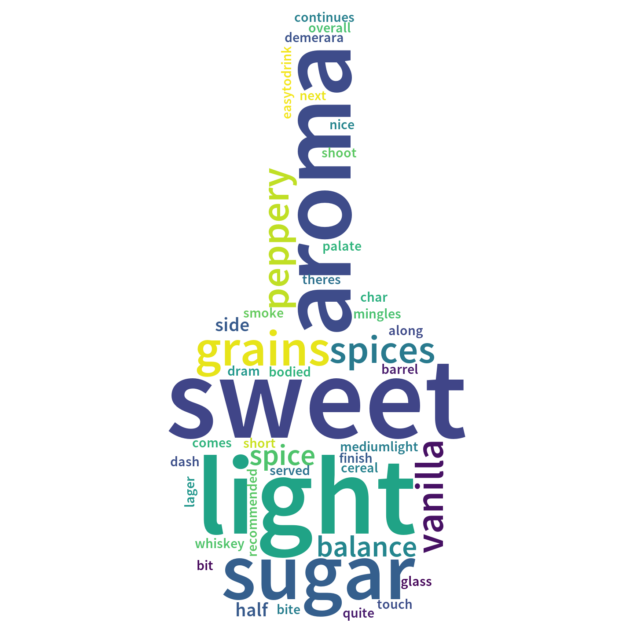

In [29]:
# 프로그램 시작점
if __name__ == "__main__":
    main()

# 가중치 조절 옵션을 포함한 코드

In [23]:
class WhiskeyRecommender:
    def __init__(self, data_path):
        # 데이터 로드 및 TF-IDF 벡터라이저 초기화
        self.data = pd.read_csv(data_path)
        # TF-IDF 벡터라이저를 영어 불용어를 제거하는 옵션으로 초기화.
        self.tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    def prepare_data(self):
        # 맛 정보 텍스트 데이터를 TF-IDF 매트릭스로 변환
        self.taste_matrix = self.tfidf_vectorizer.fit_transform(self.data['Taste Note'])

    def get_user_input(self):
        w1, w2 = 0.5, 0.5  # 기본 가중치 설정

        while True:
            preference_option = int(input("추천 방식을 선택해주세요 (1: 개인선호도, 2: 평점, 3: 보통): "))
            
            #개인 선호도 중시
            if preference_option == 1:
                w1, w2 = 0.7, 0.3
                
            #평점 중시
            elif preference_option == 2:
                w1, w2 = 0.3, 0.7
                
            #개인 선호도와 평점 균형
            elif preference_option == 3:
                w1, w2 = 0.5, 0.5
            else:
                print("올바른 선택지를 입력하세요.")
                continue
                    
            user_taste = input("원하는 맛을 입력하세요: ")
            try:
                user_richness = int(input("맛의 풍부한 정도 정도를 입력하세요(0~10): ")) * 10
                user_full_bodied = int(input("맛의 가벼움 정도를 입력하세요(0~10): ")) * 10
                user_smoky = int(input("스모키함의 정도를 입력하세요(0~10): ")) * 10
                user_sweetness = int(input("단맛의 정도를 입력하세요(0~10): ")) * 10

                if 0 <= user_richness <= 100 and 0 <= user_full_bodied <= 100 and 0 <= user_smoky <= 100 and 0 <= user_sweetness <= 100:
                    return user_taste, w1, w2, user_richness, user_full_bodied, user_smoky, user_sweetness
                else:
                    print("올바른 범위의 값을 입력하세요.")
            except ValueError:
                print("숫자를 입력하세요.")


    def calculate_similarity(self, user_taste_vector, user_data_matrix):
        # 사용자 입력과 위스키 데이터 간의 유사도 계산
        taste_similarity = cosine_similarity(user_taste_vector, self.taste_matrix)
        numeric_similarity = cosine_similarity(user_data_matrix, self.data[['Rich', 'Full_bodied', 'Smoky', 'Sweet']])
        total_similarity = 0.4 * taste_similarity + 0.6 * numeric_similarity
        return total_similarity

    def recommend_whiskies(self, total_similarity):
        # 가장 유사한 위스키 추천
        top_indices = total_similarity.argsort()[0][-5:][::-1]
        top_whiskies = self.data.iloc[top_indices]
        return top_whiskies

    def calculate_r_ratios(self, top_indices, total_similarity, w1, w2):
        '''
        R값 계산
        계산식 : R = (w1B + w2G)/C
        B(유사도), G(평점), C(가격), w1/w2(가중치)
        '''
        R_ratios = []

        # MinMaxScaler 객체 생성
        scaler = MinMaxScaler()

        for idx in top_indices:
            similarity = total_similarity[0][idx]
            rating = self.data.loc[idx, 'Rating'] # 평점 정보 가져오기
            cost_level = self.data.loc[idx, 'Cost level'] # 가격 정보 가져오기

            # 평점을 0에서 1 사이로 정규화
            normalized_rating = scaler.fit_transform([[rating]])[0][0]

            R_ratio = (w1 * similarity + w2 * normalized_rating) / (cost_level if cost_level != 0 else 1)
            R_ratios.append(R_ratio)

        return R_ratios


    def print_recommendations(self, sorted_result):
        # 추천 위스키 목록과 첫 번째 추천 위스키 출력
        print("추천 위스키 목록:")
        print(sorted_result[['Whiskey', 'R Ratio']], '\n')
        print("추천 위스키:", sorted_result['Whiskey'].iloc[0])
        print("위스키 종류:", sorted_result['kind_of_whisky'].iloc[0])
        print("도수:", sorted_result['abv'].iloc[0])
        print("숙성 년수:", sorted_result['age'].iloc[0])
        print("평점:", sorted_result['Rating'].iloc[0])
        
        
    """
    여기서부터는 워드클라우드 부분----------------------------------------------------------
    """
        
    # 불필요한 공백이나 캐리지리턴 문자 제거하는 함수
    @staticmethod
    def strip_cr(words):
        output = []
        for word in words:
            output.append(word.strip())
        return output

    # 전처리 및 토큰화 작업
    @staticmethod
    def preprocessing(text):
        output1 = []
        for line in text:
            # 공백라인 건너뛰기
            if line == '':
                continue

            # 소문자로 통일
            line = line.lower()

            # 알파벳과 공백을 제외한 모든 기호는 제거
            p = re.compile('[^a-z ]+')
            line = p.sub('', line)
            # 문장 속 단어를 토큰으로 분리
            words = line.split()
            output1 += words
        # 불용어 제거
        output2 = []
        for word in output1:
            if word not in stopwords.words('english'):
                output2.append(word)
        return output2

    # 토큰 리스트로부터 도수분포 딕셔너리 만들기
    @staticmethod
    def make_token_freq_dict(token_list):
        output_dict = {}
        for token in token_list:
            if token in output_dict.keys():
                output_dict[token] += 1
            else:
                output_dict[token] = 1
        return output_dict
    
    def generate_wordcloud(self, sorted_result, img_path, taste_file_path):
        #마스크 이미지 불러오기
        img = Image.open(img_path)
        img_array = np.array(img)
        
        #맛표현 사전 불러오기
        with open(taste_file_path, 'r') as f:
            document_n = f.readlines()
            taste_words = self.strip_cr(document_n)

        row = sorted_result.loc[sorted_result['Whiskey'] == sorted_result['Whiskey'].iloc[0]]
        if not row.empty:
            name = row['Whiskey'].values[0] # 이름
            tasting_note = row['Taste Note'].values[0] # 맛 정보

            #전처리 및 토큰화후 도수분포표로 만들기
            tokens = self.preprocessing([tasting_note])
            word_count = self.make_token_freq_dict(tokens)
        
            # 가장 많이 카운트된 요소의 빈도수 계산
            most_common_word = max(word_count, key=word_count.get)
            most_common_freq = word_count[most_common_word]
        
            # 가장 많이 카운트된 요소의 2배의 가중치 계산
            weighted_value = int(2 * most_common_freq)

            for key, value in word_count.items():
                if key in taste_words:
                    #가중치 부여
                    word_count[key] += weighted_value
                
            #워드클라우드 생성
            f_p = '/Users/seojuncheol/Desktop/논문/whiskey/data/word_cloud/font/SourceSansPro-Semibold.otf'
            wc = WordCloud(font_path=f_p, background_color='white', width=400, height=400, scale=2.0, max_font_size=250, mask=img_array)
            gen = wc.generate_from_frequencies(word_count)
            plt.figure(figsize=(8, 8))
            plt.imshow(gen, interpolation="bilinear")
            plt.axis("off")
            plt.show()
        else:
            print("Whiskey name not found.")

In [24]:
def main():
    # 파일 경로 설정
    data_path = '/Users/seojuncheol/Desktop/논문/whiskey/data/whiskey_info.csv'
    img_path = '/Users/seojuncheol/Desktop/논문/whiskey/data/word_cloud/whisky_bottle.png'
    taste_file_path = '/Users/seojuncheol/Desktop/논문/whiskey/data/word_cloud/taste.txt'
    
    # 위스키 추천 시스템 객체 생성 및 데이터 준비
    recommender = WhiskeyRecommender(data_path)
    recommender.prepare_data()  # 맛 정보를 TF-IDF 매트릭스로 변환

    # 사용자 입력 받기
    user_taste, w1, w2, user_richness, user_full_bodied, user_smoky, user_sweetness = recommender.get_user_input()

    # 사용자 입력을 기반으로 유사도 계산에 사용할 데이터 준비
    user_taste_vector = recommender.tfidf_vectorizer.transform([user_taste])
    user_data = [[user_richness, user_full_bodied, user_smoky, user_sweetness]]
    user_data_matrix = pd.DataFrame(user_data, columns=['Rich', 'Full_bodied', 'Smoky', 'Sweet'])

    # 유사도 계산
    total_similarity = recommender.calculate_similarity(user_taste_vector, user_data_matrix)

    # 가장 유사한 위스키 추천
    top_whiskies = recommender.recommend_whiskies(total_similarity)

    # R 값 계산
    R_ratios = recommender.calculate_r_ratios(top_whiskies.index, total_similarity, w1, w2)

    # 결과 데이터프레임 생성 및 정렬
    result_data = {'Whiskey': top_whiskies['Name'], 'Taste Note': top_whiskies['Taste Note'],
                   'kind_of_whisky': top_whiskies['kind_of_whisky'], 'age': top_whiskies['age'], 'abv': top_whiskies['abv'],
                   'Similarity': total_similarity[0][top_whiskies.index], 'Rating': top_whiskies['Rating'],
                   'Cost level': top_whiskies['Cost level'], 'R Ratio': R_ratios}
    result_df = pd.DataFrame(result_data)
    sorted_result = result_df.sort_values(by='R Ratio', ascending=False)

    # 추천 결과 및 첫 번째 추천 위스키 출력
    recommender.print_recommendations(sorted_result)

    # 워드클라우드 생성 및 출력
    recommender.generate_wordcloud(sorted_result, img_path, taste_file_path)

추천 방식을 선택해주세요 (1: 개인선호도, 2: 평점, 3: 보통): 1
원하는 맛을 입력하세요: litte sweet and light flaver and apple, orange, pear
Rich 정도를 입력하세요(0~10): 4
Full-bodied 정도를 입력하세요(0~10): 1
Smoky 정도를 입력하세요(0~10): 1
Sweet 정도를 입력하세요(0~10): 9
추천 위스키 목록:
                                                 Whiskey   R Ratio
507    Coopers' Craft Original 82.2 Proof Kentucky St...  0.213010
5103                                       Elk Rider Rye  0.210480
702                       Glen Grant The Major's Reserve  0.205105
1525                          Kurayoshi 8 Year Pure Malt  0.139486
10242            Daftmill 2006 Summer Batch Release (US)  0.080852 

추천 위스키: Coopers' Craft Original 82.2 Proof Kentucky Straight Bourbon
위스키 종류: Bourbon
도수: 41.1
숙성 년수: NAS
평점: 3.29


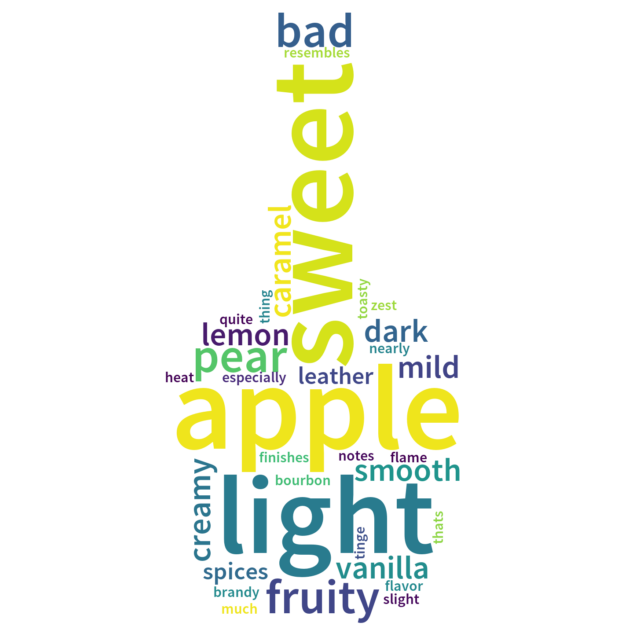

In [22]:
# 프로그램 시작점
if __name__ == "__main__":
    main()

## 교수님의 피드백으로는 Rating만 정규화를 시키는 것이 아닌 모든 값을 정규화시켜야 좋을거같다고 하심

<hr style="border: 2px solid rgb(10, 47, 102)">
<center><span style="font-size: 2.5em; font-weight: bold; color: #000000;">최종 코드</span>
<hr style="border: 2px solid rgb(10, 47, 102)">

In [9]:
class WhiskeyRecommender:
    def __init__(self, data_path):
        # 데이터 로드 및 TF-IDF 벡터라이저 초기화
        self.data = pd.read_csv(data_path)
        # TF-IDF 벡터라이저를 영어 불용어를 제거하는 옵션으로 초기화.
        self.tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    def prepare_data(self):
        # 맛 정보 텍스트 데이터를 TF-IDF 매트릭스로 변환
        self.taste_matrix = self.tfidf_vectorizer.fit_transform(self.data['Taste Note'])

    def get_user_input(self):
        w1, w2 = 0.5, 0.5  # 기본 가중치 설정

        while True:
            preference_option = int(input("추천 방식을 선택해주세요 (1: 개인선호도, 2: 평점, 3: 보통): "))
            
            #개인 선호도 중시
            if preference_option == 1:
                w1, w2 = 0.7, 0.3
                
            #평점 중시
            elif preference_option == 2:
                w1, w2 = 0.3, 0.7
                
            #개인 선호도와 평점 균형
            elif preference_option == 3:
                w1, w2 = 0.5, 0.5
            else:
                print("올바른 선택지를 입력하세요.")
                continue
                    
            user_taste = input("원하는 맛을 입력하세요: ")
            try:
                user_richness = int(input("맛의 풍부한 정도 정도를 입력하세요(0~10): ")) * 10
                user_full_bodied = int(input("맛의 가벼움 정도를 입력하세요(0~10): ")) * 10
                user_smoky = int(input("스모키함의 정도를 입력하세요(0~10): ")) * 10
                user_sweetness = int(input("단맛의 정도를 입력하세요(0~10): ")) * 10
                
                #예외처리
                if 0 <= user_richness <= 100 and 0 <= user_full_bodied <= 100 and 0 <= user_smoky <= 100 and 0 <= user_sweetness <= 100:
                    return user_taste, w1, w2, user_richness, user_full_bodied, user_smoky, user_sweetness
                else:
                    print("올바른 범위의 값을 입력하세요.")
            except ValueError:
                print("숫자를 입력하세요.")


    def calculate_similarity(self, user_taste_vector, user_data_matrix):
        # 사용자 입력과 위스키 데이터 간의 유사도 계산
        taste_similarity = cosine_similarity(user_taste_vector, self.taste_matrix)
        numeric_similarity = cosine_similarity(user_data_matrix, self.data[['Rich', 'Full_bodied', 'Smoky', 'Sweet']])
        total_similarity = 0.4 * taste_similarity + 0.6 * numeric_similarity
        return total_similarity

    def recommend_whiskies(self, total_similarity):
        # 가장 유사한 위스키 추천
        top_indices = total_similarity.argsort()[0][-5:][::-1]
        top_whiskies = self.data.iloc[top_indices]
        return top_whiskies

    def calculate_r_ratios(self, top_indices, total_similarity, w1, w2):
        '''
        R값 계산
        계산식 : R = (w1B + w2G)/C
        B(유사도), G(평점), C(가격), w1/w2(가중치)
        '''
        R_ratios = []

        for idx in top_indices:
            similarity = total_similarity[0][idx]
            rating = self.data.loc[idx, 'Rating'] / 5# 평점 정보 가져오고 0과1사이로 정규화
            cost_level = self.data.loc[idx, 'Cost level'] / 5# 가격 정보 가져오고 0과 1사이로 정규화
            #Rating, cost_level둘다 0에서 5가 최댓값인 데이터기 때문에 가능

            R_ratio = (w1 * similarity + w2 * rating) / (cost_level if cost_level != 0 else 1)
            R_ratios.append(R_ratio)
        return R_ratios


    def print_recommendations(self, sorted_result):
        # 추천 위스키 목록과 첫 번째 추천 위스키 출력
        print("추천 위스키 목록:")
        print(sorted_result[['Whiskey', 'R']], '\n')
        print("추천 위스키:", sorted_result['Whiskey'].iloc[0])
        print("위스키 종류:", sorted_result['kind_of_whisky'].iloc[0])
        print("도수:", sorted_result['abv'].iloc[0])
        print("숙성 년수:", sorted_result['age'].iloc[0])
        print("평점:", sorted_result['Rating'].iloc[0])
        print("유사도:", sorted_result['Total Similarity'].iloc[0])
        print("가격대:", sorted_result['Cost Level'].iloc[0])
        
        
    """
    여기서부터는 워드클라우드 부분----------------------------------------------------------
    """
        
    # 불필요한 공백이나 캐리지리턴 문자 제거하는 함수
    @staticmethod
    def strip_cr(words):
        output = []
        for word in words:
            output.append(word.strip())
        return output

    # 전처리 및 토큰화 작업
    @staticmethod
    def preprocessing(text):
        output1 = []
        for line in text:
            # 공백라인 건너뛰기
            if line == '':
                continue

            # 소문자로 통일
            line = line.lower()

            # 알파벳과 공백을 제외한 모든 기호는 제거
            p = re.compile('[^a-z ]+')
            line = p.sub('', line)
            # 문장 속 단어를 토큰으로 분리
            words = line.split()
            output1 += words
        # 불용어 제거
        output2 = []
        for word in output1:
            if word not in stopwords.words('english'):
                output2.append(word)
        return output2

    # 토큰 리스트로부터 도수분포 딕셔너리 만들기
    @staticmethod
    def make_token_freq_dict(token_list):
        output_dict = {}
        for token in token_list:
            if token in output_dict.keys():
                output_dict[token] += 1
            else:
                output_dict[token] = 1
        return output_dict
    
    def generate_wordcloud(self, sorted_result, img_path, taste_file_path):
        #마스크 이미지 불러오기
        img = Image.open(img_path)
        img_array = np.array(img)
        
        #맛표현 사전 불러오기
        with open(taste_file_path, 'r') as f:
            document_n = f.readlines()
            taste_words = self.strip_cr(document_n)

        row = sorted_result.loc[sorted_result['Whiskey'] == sorted_result['Whiskey'].iloc[0]]
        if not row.empty:
            name = row['Whiskey'].values[0] # 이름
            tasting_note = row['Taste Note'].values[0] # 맛 정보

            #전처리 및 토큰화후 도수분포표로 만들기
            tokens = self.preprocessing([tasting_note])
            word_count = self.make_token_freq_dict(tokens)
        
            # 가장 많이 카운트된 요소의 빈도수 계산
            most_common_word = max(word_count, key=word_count.get)
            most_common_freq = word_count[most_common_word]
        
            # 가장 많이 카운트된 요소의 2배의 가중치 계산
            weighted_value = int(2 * most_common_freq)

            for key, value in word_count.items():
                if key in taste_words:
                    #가중치 부여
                    word_count[key] += weighted_value
                
            #워드클라우드 생성
            f_p = '/Users/seojuncheol/Desktop/논문/whiskey/data/word_cloud/font/SourceSansPro-Semibold.otf'
            wc = WordCloud(font_path=f_p, background_color='white', width=400, height=400, scale=2.0, max_font_size=250, mask=img_array)
            gen = wc.generate_from_frequencies(word_count)
            plt.figure(figsize=(8, 8))
            plt.imshow(gen, interpolation="bilinear")
            plt.axis("off")
            plt.show()
        else:
            print("Whiskey name not found.")

In [10]:
def main():
    # 파일 경로 설정
    data_path = '/Users/seojuncheol/Desktop/논문/whiskey/data/whiskey_info.csv'
    img_path = '/Users/seojuncheol/Desktop/논문/whiskey/data/word_cloud/whisky_bottle.png'
    taste_file_path = '/Users/seojuncheol/Desktop/논문/whiskey/data/word_cloud/taste.txt'
    
    # 위스키 추천 시스템 객체 생성 및 데이터 준비
    recommender = WhiskeyRecommender(data_path)
    recommender.prepare_data()  # 맛 정보를 TF-IDF 매트릭스로 변환

    # 사용자 입력 받기
    user_taste, w1, w2, user_richness, user_full_bodied, user_smoky, user_sweetness = recommender.get_user_input()

    # 사용자 입력을 기반으로 유사도 계산에 사용할 데이터 준비
    user_taste_vector = recommender.tfidf_vectorizer.transform([user_taste])
    user_data = [[user_richness, user_full_bodied, user_smoky, user_sweetness]]
    user_data_matrix = pd.DataFrame(user_data, columns=['Rich', 'Full_bodied', 'Smoky', 'Sweet'])

    # 유사도 계산
    total_similarity = recommender.calculate_similarity(user_taste_vector, user_data_matrix)

    # 가장 유사한 위스키 추천
    top_whiskies = recommender.recommend_whiskies(total_similarity)

    # R 값 계산
    R_ratios = recommender.calculate_r_ratios(top_whiskies.index, total_similarity, w1, w2)

    # 결과 데이터프레임 생성 및 정렬
    result_data = {'Whiskey': top_whiskies['Name'], 'Taste Note': top_whiskies['Taste Note'],
               'kind_of_whisky': top_whiskies['kind_of_whisky'], 'age': top_whiskies['age'], 'abv': top_whiskies['abv'],
               'Similarity': total_similarity[0][top_whiskies.index], 'Rating': top_whiskies['Rating'],
               'Cost level': top_whiskies['Cost level'], 'R': R_ratios, 'Total Similarity': total_similarity[0][top_whiskies.index], 'Cost Level': top_whiskies['Cost level']}
    result_df = pd.DataFrame(result_data)
    sorted_result = result_df.sort_values(by='R', ascending=False)

    # 추천 결과 및 첫 번째 추천 위스키 출력
    recommender.print_recommendations(sorted_result)

    # 워드클라우드 생성 및 출력
    recommender.generate_wordcloud(sorted_result, img_path, taste_file_path)

추천 방식을 선택해주세요 (1: 개인선호도, 2: 평점, 3: 보통): 1
원하는 맛을 입력하세요: I want to drink whiskey that has a moderate sweetness and fresh flavors like apple, orange, lemon
맛의 풍부한 정도 정도를 입력하세요(0~10): 8
맛의 가벼움 정도를 입력하세요(0~10): 7
스모키함의 정도를 입력하세요(0~10): 2
단맛의 정도를 입력하세요(0~10): 5
추천 위스키 목록:
                                                Whiskey         R
5894                    Wigle's Walkabout Apple Whiskey  1.176946
5950  Hidden Barn Small Batch Bourbon Series One (Ba...  1.139159
3344                           2XO The Innkeepers Blend  0.919086
1570                      Blood Oath Bourbon Pact No. 1  0.864260
4070  Booker's Bourbon Batch 2023-02 "Apprentice Batch"  0.861722 

추천 위스키: Wigle's Walkabout Apple Whiskey
위스키 종류: FlavoredWhiskey
도수: 44.8
숙성 년수: NAS
평점: 3.81


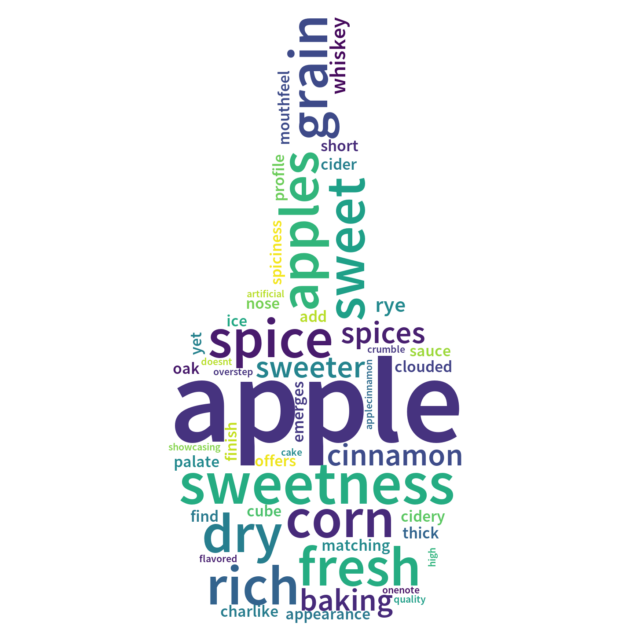

In [17]:
if __name__ == "__main__":
    main()

<hr style="border: 2px solid rgb(10, 47, 102)">
<center><span style="font-size: 2.5em; font-weight: bold; color: #000000;">시뮬레이션</span>
<hr style="border: 2px solid rgb(10, 47, 102)">

# 시나리오#1
- ## 시나리오 설명 : 사용자가 다양한 위스키 특성에 대한 선호도를 제공하고 추천 방식을 선택.
- ## 입력
    + #### 추천방식 : 개인 선호도에 따른 추천
    + #### Taste Note : I want to drink whiskey that has a moderate sweetness and fresh flavors like apple, orange, lemon
    + #### Rich : 8
    + #### Full_bodied : 7
    + #### Smoky : 2
    + #### Sweet : 5
- ## 설명 : 사용자는 풍부한 맛과 무거운 맛, 적당한 단맛, 낮은 스모키함을 가진 위스키를 선호. 개인 취향에 우선순위를 두고 싶어함. 또한 사과, 오렌지, 레몬등과 같은 상큼한 과일들의 향을 가지고있는 위스키를 마시고싶어함

추천 방식을 선택해주세요 (1: 개인선호도, 2: 평점, 3: 보통): 1
원하는 맛을 입력하세요: I want to drink whiskey that has a moderate sweetness and fresh flavors like apple, orange, lemon
맛의 풍부한 정도 정도를 입력하세요(0~10): 8
맛의 가벼움 정도를 입력하세요(0~10): 7
스모키함의 정도를 입력하세요(0~10): 2
단맛의 정도를 입력하세요(0~10): 5
추천 위스키 목록:
                                                Whiskey   R Ratio
5894                    Wigle's Walkabout Apple Whiskey  1.176946
5950  Hidden Barn Small Batch Bourbon Series One (Ba...  1.139159
3344                           2XO The Innkeepers Blend  0.919086
1570                      Blood Oath Bourbon Pact No. 1  0.864260
4070  Booker's Bourbon Batch 2023-02 "Apprentice Batch"  0.861722 

추천 위스키: Wigle's Walkabout Apple Whiskey
위스키 종류: FlavoredWhiskey
도수: 44.8
숙성 년수: NAS
평점: 3.81


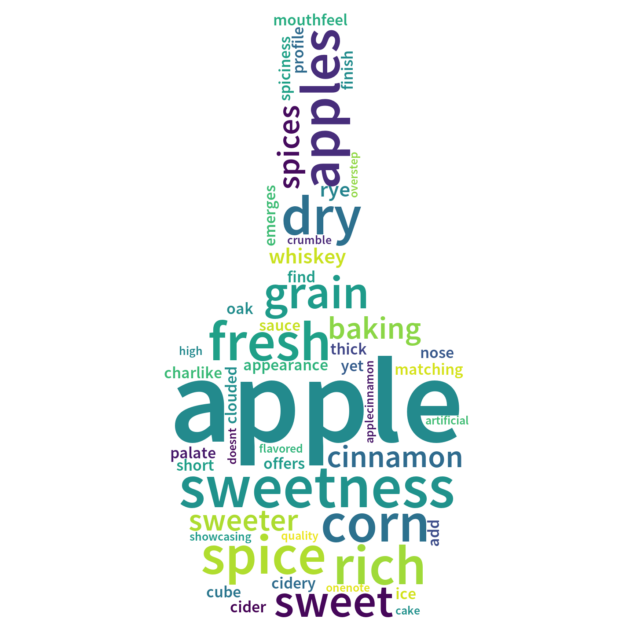

In [14]:
if __name__ == "__main__":
    main()

<hr style="border: 2px solid rgb(10, 47, 102)">

# 시나리오#2
- ## 시나리오 설명 : 사용자가 개인 선호도 보다 평점을 중시
- ## 입력
    + #### 추천방식 : 평점에 무게를 둔 추천
    + #### Taste Note : I like to drink whiskeys that emphasize aged flavors like leather and wood, and smoky, sweet notes.
    + #### Rich : 4
    + #### Full_bodied : 6
    + #### Smoky : 9
    + #### Sweet : 8
- ## 설명 : 사용자가 선호하는 위스키의 특성은 중간 정도의 풍부함, 풀 바디감과 높은 스모키한 맛과 단맛을 선호. 개인적인 취향 선호도보다 등급을 우선시. 또한 가죽, 나무향과 같은 향과 단맛, 스모키함이 강조되기를 원함

추천 방식을 선택해주세요 (1: 개인선호도, 2: 평점, 3: 보통): 2
원하는 맛을 입력하세요: I like to drink whiskeys that emphasize aged flavors like leather and wood, and smoky, sweet notes.
맛의 풍부한 정도 정도를 입력하세요(0~10): 4
맛의 가벼움 정도를 입력하세요(0~10): 6
스모키함의 정도를 입력하세요(0~10): 9
단맛의 정도를 입력하세요(0~10): 8
추천 위스키 목록:
                                          Whiskey         R
42              Willett Pot Still Reserve Bourbon  1.809608
1413  Lagavulin Offerman Edition Charred Oak Cask  1.281987
1198                         Glen Deveron 16 Year  1.162993
1410                    Highland Park Full Volume  0.893165
4538       Talisker 8 Year (2021 Special Release)  0.879599 

추천 위스키: Willett Pot Still Reserve Bourbon
위스키 종류: Bourbon
도수: 47.0
숙성 년수: NAS
평점: 3.71


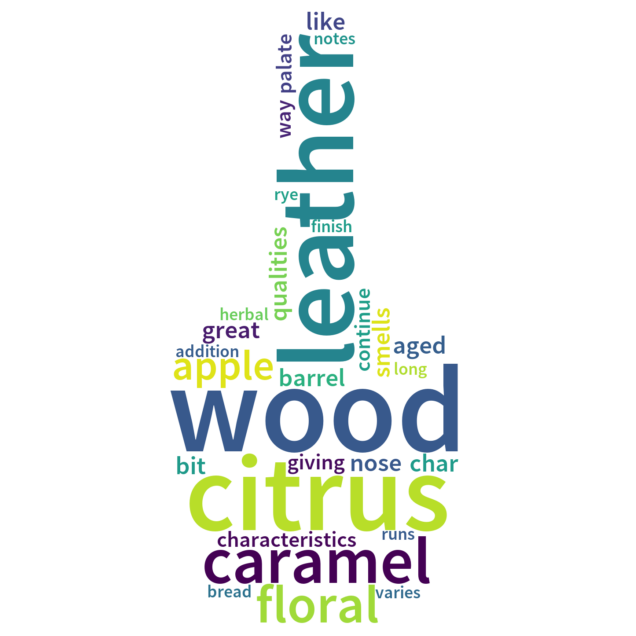

In [18]:
if __name__ == "__main__":
    main()

<hr style="border: 2px solid rgb(10, 47, 102)">

# 시나리오#3
- ## 시나리오 설명 : 사용자가 균형잡힌 선호도를 제공
- ## 입력
    + #### 추천방식 : 사용자 선호도, 평점이 균형을 이룸
    + #### Taste Note : I want to drink whiskey that tastes balanced and stable.
    + #### Rich : 5
    + #### Full_bodied : 5
    + #### Smoky : 5
    + #### Sweet : 5
- ## 설명 : 사용자가 모든 특성에 대해 균형잡힌 특성을 선호.

추천 방식을 선택해주세요 (1: 개인선호도, 2: 평점, 3: 보통): 3
원하는 맛을 입력하세요: I want to drink whiskey that tastes balanced and stable.
맛의 풍부한 정도 정도를 입력하세요(0~10): 5
맛의 가벼움 정도를 입력하세요(0~10): 5
스모키함의 정도를 입력하세요(0~10): 5
단맛의 정도를 입력하세요(0~10): 5
추천 위스키 목록:
                                                 Whiskey         R
19                          Glenlivet 12 Year Double Oak  1.725340
138                                 Bushmills Black Bush  1.691357
10732                Brother's Bond American Blended Rye  1.170055
1640   George Dickel x Leopold Bros Collaboration Ble...  0.954060
1570                       Blood Oath Bourbon Pact No. 1  0.869260 

추천 위스키: Glenlivet 12 Year Double Oak
위스키 종류: SingleMalt
도수: 40.0
숙성 년수: 12 Year
평점: 3.41


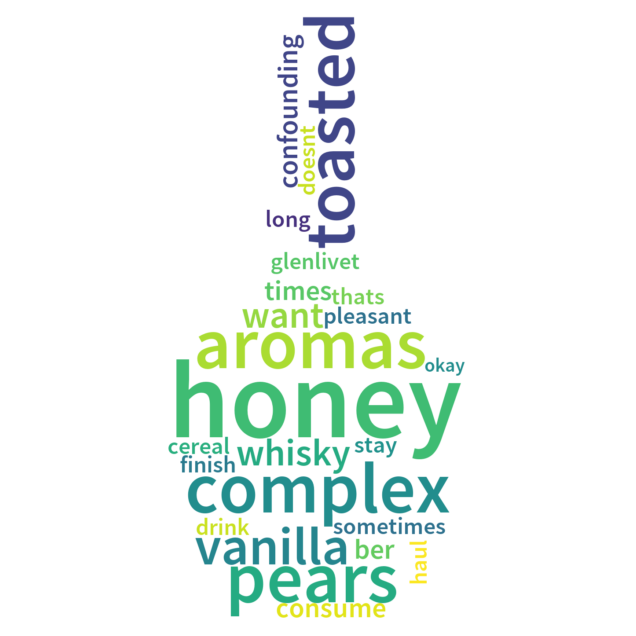

In [19]:
if __name__ == "__main__":
    main()